# Erstellung der Modelle und Modellwahlverfahren

### Laden der Daten und seperation nach Autoren:

In [12]:
beech.data <- read.csv("buche.csv")
head(beech.data)

author,hsl,age,dbh,height,biom
Bartelink,23,20,8.4,9.80,22.7
Bartelink,23,20,9.9,11.25,29.2
Bartelink,23,20,10.7,9.70,38.7
Bartelink,23,21,10.6,9.75,31.3
Bartelink,23,21,10.7,9.30,32.0
Bartelink,23,21,7.0,8.40,11.3


In [13]:
authors=unique(beech.data$author)
for (string in authors) {
  value <- subset(beech.data, author == string)  # Setze hier den gewünschten Wert ein
  assign(paste0("data_", string), value)
}

In [14]:
authors

[1] Bartelink Heller    Joosten  
Levels: Bartelink Heller Joosten

<br>
<font size="4"> <font color='green'> Auswahl des Datensatzes von einem Autor:</font> </font>
<br>

In [21]:
### selection of the current authors data
current_data=data_Joosten
title="Joosten"

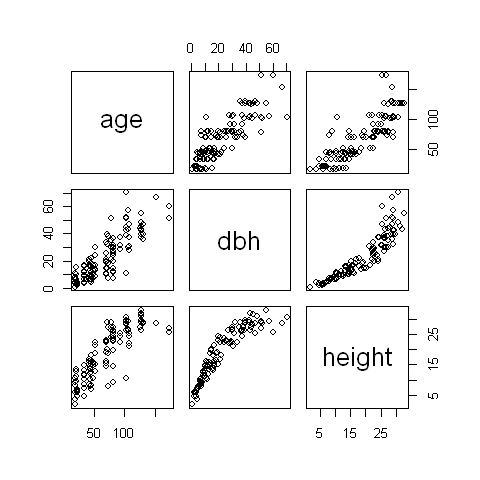

In [22]:
### visualisation of the correlation of the influencing factors
options(repr.plot.width = 4, repr.plot.height = 4)
plot(current_data[3:5])

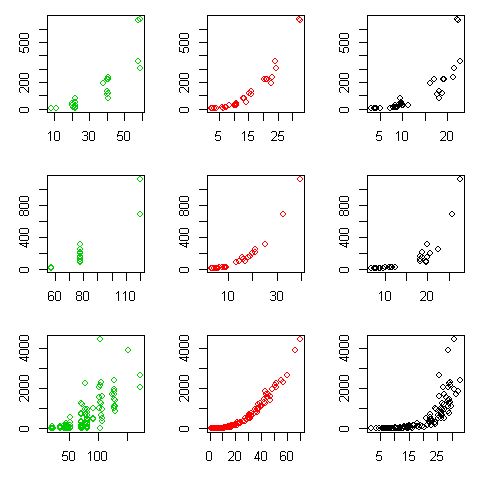

In [17]:
### visualize the relevant dependencies of the biomass and the influencing factors for every authors data
### age is green; dbh(durchmesserBrusthöhe) is red; height is black
### first row is from author Bartelink, second from Heller and third from Joosten

par(mfrow=c(3,3), mar=c(3,3,1,1))
plot(biom~age, data=data_Bartelink,xlab="age", ylab="biomass",col=3)
plot(biom~dbh, data=data_Bartelink,xlab="dbh", ylab="biomass",col=2)
plot(biom~height, data=data_Bartelink,xlab="height", ylab="biomass")
plot(biom~age, data=data_Heller,xlab="age", ylab="biomass",col=3)
plot(biom~dbh, data=data_Heller,xlab="dbh", ylab="biomass",col=2)
plot(biom~height, data=data_Heller,xlab="height", ylab="biomass")
plot(biom~age, data=data_Joosten,xlab="age", ylab="biomass",col=3)
plot(biom~dbh, data=data_Joosten,xlab="dbh", ylab="biomass",col=2)
plot(biom~height, data=data_Joosten,xlab="height", ylab="biomass")

<br>
<br>
<font size="4">Erstellung von Modellen für genau eine Einflussgröße um die Abhängigkeit zu analysieren:</font>
<br>
<br>

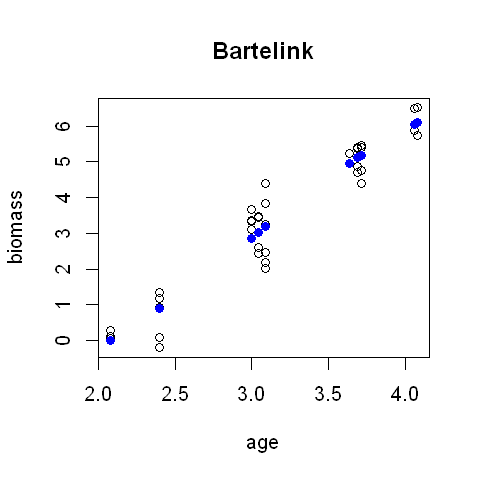

In [18]:
### dependency of the biomass in relation to the age of the beech
plot(log(current_data$age), log(current_data$biom), main=title, xlab="age", ylab="biomass")
Mage1=lm(log(biom) ~ 1 + log(age) , data = current_data)
Mage2=lm(log(biom) ~ 1 + log(age) + I(log(age)^2), data = current_data)
Mage3=lm(log(biom) ~ 1 + log(age) + I(log(age)^2)+ I(log(age)^3), data = current_data)
points(log(current_data$age), predict(Mage3,type='response'), pch=16, col=4)

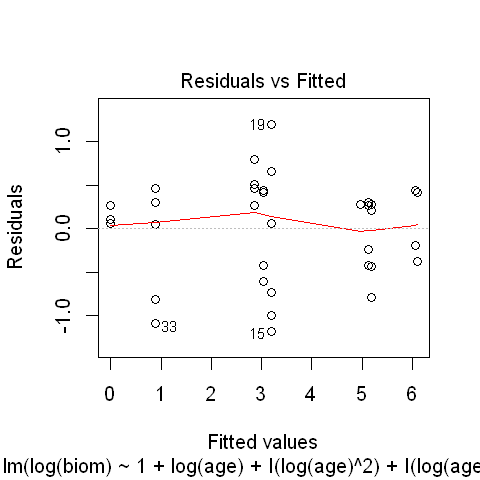

In [19]:
plot(Mage3,which=1)

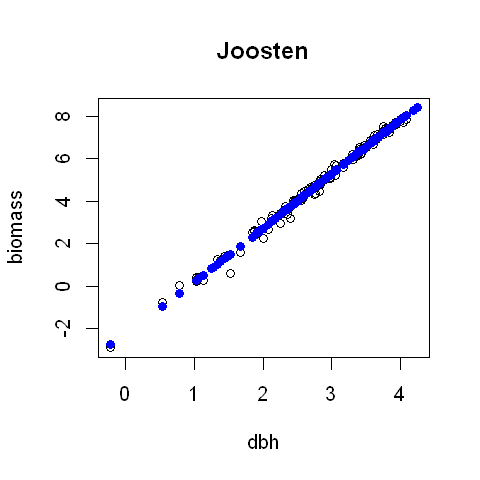

In [17]:
plot(log(current_data$dbh), log(current_data$biom), main=title, xlab="dbh", ylab="biomass")
Mdbh1=lm(log(biom) ~ 1 + I(log(dbh)) , data = current_data)
Mdbh2=lm(log(biom) ~ 1 + I(log(dbh)) + I(log(dbh)^2) , data = current_data)
Mdbh3=lm(log(biom) ~ 1 + I(log(dbh)) + I(log(dbh)^2) + I(log(dbh)^3) , data = current_data)
points(log(current_data$dbh), predict(Mdbh3,type='response'), pch=16, col=4)

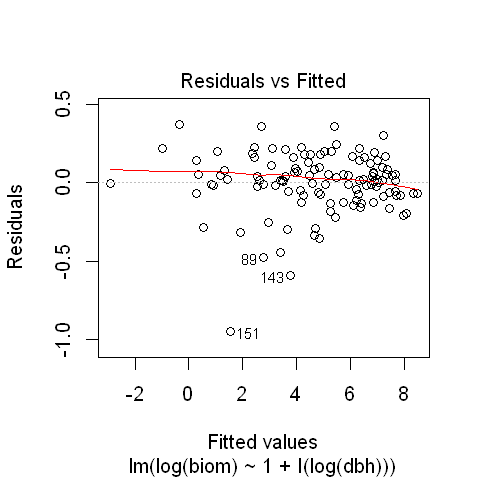

In [19]:
plot(Mdbh1,which=1)

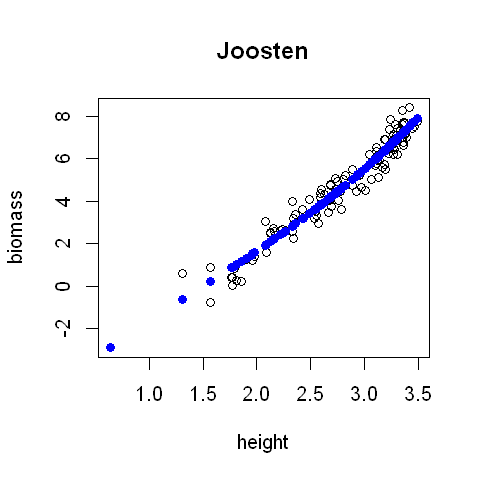

In [20]:
plot(log(current_data$height), log(current_data$biom), main=title, xlab="height", ylab="biomass")
Mheight1=lm(log(biom) ~ 1 + I(log(height)), data = current_data)
Mheight2=lm(log(biom) ~ 1 + I(log(height))+ I(log(height)^2), data = current_data)
Mheight3=lm(log(biom) ~ 1 + I(log(height))+ I(log(height)^2)+ I(log(height)^3), data = current_data)
points(log(current_data$height), predict(Mheight3,type='response'), pch=16, col=4)

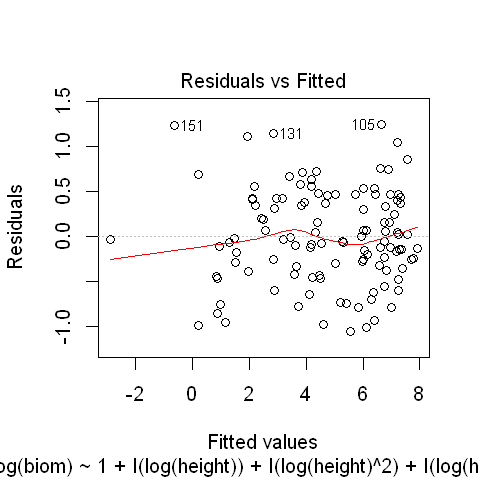

In [22]:
plot(Mheight3,which=1)

<br>
<br>
<font size="3">Erstellen von Modellen, die alle (relevanten) Einflussgrößen einbeziehen und aus der vorherigen Analyse als sinnvoll erachtet wurden:</font>
<br>
<br>

In [23]:
M1=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + I(log(height)) , data = current_data)
M2=lm(log(biom) ~ 1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(dbh)^2) + I(log(dbh)^3) + I(log(height)) + I(log(height)^2) + I(log(height)^3) +I(log(height)^4), data = current_data)
M3=lm(log(biom) ~ 1 + I(log(age)) + I(log(age)^2) + log(dbh) + I(log(dbh)^2) + I(log(dbh)^3) + I(log(height)) + I(log(height)^2) + I(log(height)^3) + I(log(height)^4) + log(age):log(dbh) + log(age):log(height)+ log(dbh):log(height), data = current_data)
M4=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + I(log(dbh)^2) + I(log(dbh)^3) + I(log(height)) + I(log(height)^3) , data = current_data)
M5=lm(log(biom) ~ 1 + I(log(age)) + log(dbh) + I(log(dbh)^2) + I(log(dbh)^3) + I(log(height)) + I(log(height)^3) + log(dbh):log(height) , data = current_data)
M6=lm(log(biom) ~ 1 + I(log(age)) + I(log(height)) + log(age):log(height) + log(age):log(dbh), data = current_data)
M7=lm(log(biom) ~ 1 + I(log(dbh)) + I(log(height)) + log(dbh):log(height), data = current_data)
M8=lm(log(biom) ~ 1 + I(log(dbh)) + I(log(age)) + log(age):log(height), data = current_data)


<br>
<br>
<font size="3">Analyse der Modelle anhand des Medians der Residuals und des Residuen plots. <br> Für jeden Koeffizienten
die Auswertung im Vergleich zu allen anderen Modellen wie der Wert für Pr(>|t|) sich verhält </font>
<br>
<br>

In [75]:
summary(M2)


Call:
lm(formula = log(biom) ~ 1 + I(log(age)) + I(log(age)^2) + log(dbh) + 
    I(log(dbh)^2) + I(log(dbh)^3) + I(log(height)) + I(log(height)^2) + 
    I(log(height)^3) + I(log(height)^4), data = current_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52012 -0.07867  0.03331  0.08109  0.44442 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.21203    1.33667  -3.151 0.002114 ** 
I(log(age))       0.58656    0.40885   1.435 0.154331    
I(log(age)^2)    -0.06853    0.05258  -1.303 0.195246    
log(dbh)          1.33742    0.38822   3.445 0.000819 ***
I(log(dbh)^2)     0.30320    0.18427   1.645 0.102840    
I(log(dbh)^3)    -0.03351    0.02554  -1.312 0.192252    
I(log(height))   -0.01183    2.50109  -0.005 0.996235    
I(log(height)^2)  1.47266    1.83850   0.801 0.424915    
I(log(height)^3) -0.67601    0.58589  -1.154 0.251173    
I(log(height)^4)  0.09218    0.06779   1.360 0.176791    
---
Signif. codes:  0 '***' 0.

### Kreuzvalidierung der Modelle:

In [24]:
kreuzvalidierung <- function(model_list, data) {
    
    n=dim(data)[1]
    groups=floor(min(10,sqrt(n)))
    amount_model=length(model_list)
    r=dim(data)[1]
    
    index <- rep(1:groups, length.out=r)
    index <- sample(index)

    SEP_list=numeric(amount_model)


    for (i in 1:groups)
    {
      ### Zerlegung
        data.test <- data[index==i,]
        data.train <- data[index!=i,]

      ### Parameterschätzung
        for (m in 1:amount_model){
            suppressWarnings({
            updated_model <- update(model_list[[m]], data = data.train)
            SEP_list[m] <- SEP_list[m] + sum( ( log(data.test$biom) - predict(updated_model,newdata=data.test) )^2 )
            })
            
        }
    }

    return (SEP_list)
    }

In [25]:
### creation of a list with all models
model_list=list()
model_list[[1]] <- M1
model_list[[2]] <- M2
model_list[[3]] <- M3
model_list[[4]] <- M4
model_list[[5]] <- M5
model_list[[6]] <- M6
model_list[[7]] <- M7
model_list[[8]] <- M8

In [26]:
### running of the crossvalidation and printing of the results
set.seed(1)
SEP_list=kreuzvalidierung(model_list,current_data) 
print(SEP_list)

[1]  3.239425 14.109187  8.995284  3.530319  4.023987  3.638836  3.044969
[8]  3.514467


### Modellauswahl für den Datensatz von allen Autoren zusammen:

<font size="3">Ausführung es Codes von mit 'current_data = beech.data' und Einfügen der interaktionen zwischen den Einflussgrößen und den Authoren (as.factor(author)</font>
<br>
<br>

# Simulation für verschiedene Stichprobengrößen:

In [15]:
### function for selecting 
simulate_data <- function(data, model, n) {
    
    selected_rows <- sample(nrow(data), n,replace = TRUE) #mit zurücklegen

    # Neue Daten mit ausgewählten Zeilen erstellen
    selected_data <- data[selected_rows, ]


    predictions <- predict(model, newdata = data.frame(selected_data))

    residual_variance <- var(model$residuals)

    random_numbers <- rnorm(n, mean = 0, sd = sqrt(residual_variance))

    # returns the predicted value of the biomass with noise and the dataframe with the random selected data
    return (list(predictions+random_numbers,selected_data))
}

In [30]:
### creation of a 3D array with axis for: Model; sample size; crossvalidation results (which model was the best one)

result_list <- list()
amount_model=length(model_list)

for (m in 1:amount_model){
    model_results <- list()
    
    for (i in seq(40, 200, by = 20)){
        model_results[[as.character(i)]] <- numeric(amount_model)
    } 
    result_list[[paste("Model", m)]] <- model_results
}

<font size="3">Ausführen der kreuzvalidierung für jedes Modell, mit unterschiedlichen Stichprobengrößen (stichproben randomisiert) und Speicherung wie oft jedes Modell ausgewählt wurde </font>
<br>
<br>

In [31]:
set.seed(1)
ticks=50 #amount od runs
for (count in 1:ticks){
    for (m in 1:amount_model){     # for every model
        for (i in seq(40, 200, by = 20)){   # for every sample size
            temp=simulate_data(current_data, model_list[[m]] , i)   #Creation of randomised Data
            y_rand_data=exp(temp[[1]])  
            data=temp[[2]]            
            data$biom=y_rand_data


            SEP_list=kreuzvalidierung(model_list,data)        #Cross-validate for each model with th just created data
            index=which.min(SEP_list)                         #Index of the model with the best cross-validation result
            
            #The model with the best cross-validation score gets a score point
            result_list[[paste("Model", m)]][[as.character(i)]][index] <- result_list[[paste("Model", m)]][[as.character(i)]][index] +1
        } 

    }

}

<br>
<font size="3">Berechnung wie oft (prozentual) das ursprüngliche Modell (mit welchem die Zielgröße errechnet wurde) wieder als bestes Modell bestimmt wurde: </font>
<br>
<br>

In [32]:
all_models <- list()
for (m in 1:amount_model){    #for every model
    percentage <- list()
    for (i in seq(40, 200, by = 20)){    #for every sample size
        
        #Calculate the percentage of times the simulation model was selected as the best model by cross-validation for each sample size i
        percentage[[as.character(i)]] = (result_list[[paste("Model", m)]][[as.character(i)]][m]/ticks)*100   
        
        }
    all_models[[paste("Model", m)]] <- percentage  #save in list with all models used for simulation
}

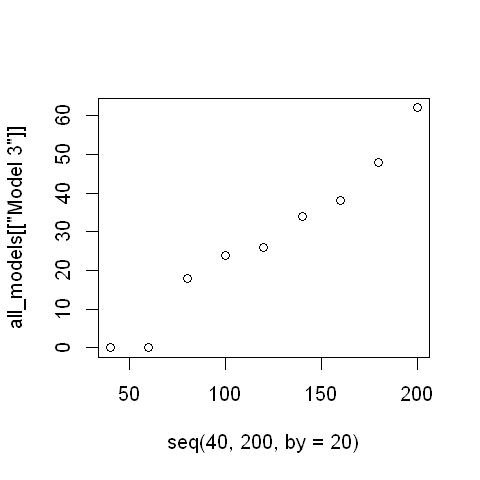

In [49]:
#plot the percentage of times the simulation model was judged to be the best model
#Example "Model 7"
options(repr.plot.width = 4, repr.plot.height = 4)
plot(seq(40, 200, by = 20),all_models[["Model 3"]])

## Simulation für ein Modell

<br>
<font size="3">Da es sehr Rechenintensiv ist, jedes Modell als Simulationsmodell einmal zu nutzten und die Kreuzvalidierung für eine große Anzahl an Durchläufen, auszuführen wird sich auf ein Simulationsmodell beschränkt. In unserem Fall auf das ursprünglich beste Modell nach der Kreuzvalidierung -> Modell 7  </font>
<br>
<br>

In [50]:
### creation of a 2D array with axis for: sample size; crossvalidation results (which model was the best one)

model_results <- list()
amount_model=length(model_list)

for (i in seq(40, 200, by = 20)){
    model_results[[as.character(i)]] <- numeric(amount_model)
} 


In [51]:
set.seed(1)
ticks=10000 #amount of runs
for (count in 1:ticks){
    for (i in seq(40, 200, by = 20)){   # for every Sample size
        temp=simulate_data(current_data, M7 , i)   #Creation of randomised Data
        y_rand_data=exp(temp[[1]])  
        data=temp[[2]]   
        data$biom=y_rand_data


        SEP_list=kreuzvalidierung(model_list,data)        #Cross-validate for each model with th just created data
        index=which.min(SEP_list)                         #Index of the model with the best cross-validation result
        
        #The model with the best cross-validation score gets a score point
        model_results[[as.character(i)]][index] <- model_results[[as.character(i)]][index] +1
    } 

}

<br>
<font size="3">Berechnung wie oft (prozentual) das ursprüngliche Modell (mit welchem die Zielgröße errechnet wurde) wieder als bestes Modell bestimmt wurde: </font>
<br>
<br>

In [69]:
M=7  #selection of the model 
percentage <- list()
for (i in seq(40, 200, by = 20)){

    #Calculate the percentage of times the simulation model was selected as the best model by cross-validation for each sample size i
    percentage[[as.character(i)]] = (model_results[[as.character(i)]][M]/ticks)*100

    }

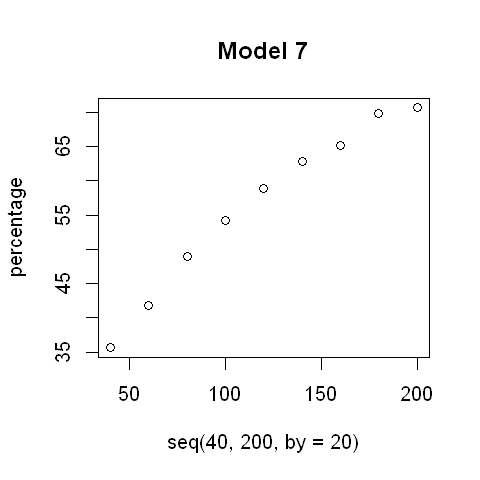

In [70]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(seq(40, 200, by = 20),percentage,main=paste("Model",M))

In [ ]:
my_df <- do.call(data.frame,model_results)
my_df
write.csv(my_df, "simulation_M7_10000ticks.csv", row.names = c("M1","M2","M3","M4","M5","M6","M7","M8"))

## Simulationsauswertung nach Häufigkeit der ausgewählten Einflussgrößen und deren Polynomen

<br>
<font size="3"> Eine Beurtteilung der Modelle kann auch durch die Bewertung einzelner Einflussvariablen erfolgen. Dabei wird ausgewertet, wie häufig  Modelle mit einer bestimmten Variable/Einflussgröße (z.B. age,age*2,etc.), durch die Kreuzvalidierung, ausgewählt wurden. Für jede Einflussvariable wird die relative Häufigkeit errechnet, mit der sie in einem "besten" Modell ausgewählt wurde. </font>
<br>
<br>

In [73]:
#defining names for the influencing variables which are used in the models
names=c("age", "age2", "dbh", "dbh2", "dbh3" ,"height", "height2", "height3" ,"height4" ,"age:dbh" ,"age:height", "dbh:height")

In [74]:
#creating a matrix which selects for every model which variables are in the model (0) and which are not (NA)
set_model_matrix <- function(names) {
    E1=c(0,NA,0,NA,NA,0,NA,NA,NA,NA,NA,NA)
    E2=c(0,0,0,0,0,0,0,0,0,NA,NA,NA)
    E3=c(0,0,0,0,0,0,0,0,0,0,0,0)
    E4=c(0,NA,0,0,0,0,NA,0,NA,NA,NA,NA)
    E5=c(0,NA,0,0,0,0,NA,0,NA,NA,NA,0)
    E6=c(0,NA,NA,NA,NA,0,NA,NA,NA,0,0,NA)
    E7=c(NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA,0)
    E8=c(0,NA,0,NA,NA,NA,NA,NA,NA,NA,0,NA)

    mat=t(cbind(E1,E2,E3,E4,E5,E6,E7,E8))  
    colnames(mat) <- names   #naming the columns like the variables
    return (mat)
}

In [75]:
#execute the model matrix creation and showing the Matrix
mat=set_model_matrix(names)
mat

,age,age2,dbh,dbh2,dbh3,height,height2,height3,height4,age:dbh,age:height,dbh:height
E1,0,NA,0,NA,NA,0,NA,NA,NA,NA,NA,NA
E2,0,0,0,0,0,0,0,0,0,NA,NA,NA
E3,0,0,0,0,0,0,0,0,0,0,0,0
E4,0,NA,0,0,0,0,NA,0,NA,NA,NA,NA
E5,0,NA,0,0,0,0,NA,0,NA,NA,NA,0
E6,0,NA,NA,NA,NA,0,NA,NA,NA,0,0,NA
E7,NA,NA,0,NA,NA,0,NA,NA,NA,NA,NA,0
E8,0,NA,0,NA,NA,NA,NA,NA,NA,NA,0,NA


In [76]:
#to calculate the relative amount of occurences of each variable we need to know how often the variable is used in the models
mat<-mat+1
frequenzy_influ_variables=colSums(mat,na.rm=TRUE) #data with amount of uses of the variables in the models
mat<-mat-1

In [77]:
#for every sample size the vector which model how often was selected (amount_selection) is saved in the model matrix (mat)
#then for every variable/column the numbers are summed up -> this is the amount of selections for each variable (colSums(mat,na.rm=TRUE))
#each entry of this vector (each amount of variables) is now devided by its amount of uses in the models (Example: height is used 7 times)
#the resulting vector is devided by the amount of ticks and multipled with 100 (percentage) to make it compareable with other tick numbers
influe_variables <- list()
for (i in seq(40, 200, by = 20)){ 
    amount_selection=c(model_results[[as.character(i)]])
    mat=set_model_matrix(names)
    mat=mat+amount_selection
    influe_variables[[as.character(i)]] <- ((colSums(mat,na.rm=TRUE)/frequenzy_influ_variables)/ticks)*100
    }
frequency_variables_percentage=round(do.call(data.frame, influe_variables),digits = 2)

<br>
<font size="3"> Die folgende Tabelle zeigt die relativen Häufigkeiten der Vorkommen der Einflussvariablen in den von der Kreuzvalidierung ausgewählten Modellen. Dabei ist zu beachten, dass die relative Häufigkeit duch die Anzahl geteilt wurde, mit der eine Einflussvariable in allen Modell vertreten ist (Bsp. height ist 7 mal in den 8 Modellen vertreten)</font>
<br>
<br>
<font size="3"> Diese Operation wurde vorgenommen, damit Einflussvariablen, welche häufig in den Modellen vorkommen, gleich gewichtet werden wie Einflussvariablen, welche kaum in den Modellen benutzt wurden.</font>
<br>
<br>

In [78]:
frequency_variables_percentage

,X40,X60,X80,X100,X120,X140,X160,X180,X200
age,9.20,8.31,7.30,6.53,5.87,5.30,4.98,4.30,4.19
age2,0.83,1.04,1.09,1.27,1.50,1.46,1.73,1.58,1.83
dbh,13.51,13.89,14.08,14.20,14.24,14.26,14.27,14.28,14.28
dbh2,2.21,2.77,3.02,3.28,3.59,3.68,4.08,3.74,4.13
dbh3,2.21,2.77,3.02,3.28,3.59,3.68,4.08,3.74,4.13
height,10.61,11.13,11.50,11.97,12.30,12.57,12.85,13.10,13.29
height2,0.83,1.04,1.09,1.27,1.50,1.46,1.73,1.58,1.83
height3,2.21,2.77,3.02,3.28,3.59,3.68,4.08,3.74,4.13
height4,0.83,1.04,1.09,1.27,1.50,1.46,1.73,1.58,1.83
age:dbh,2.91,1.65,1.01,0.66,0.63,0.47,0.54,0.48,0.54


In [81]:
mat

,age,age2,dbh,dbh2,dbh3,height,height2,height3,height4,age:dbh,age:height,dbh:height
E1,583,NA,583,NA,NA,583,NA,NA,NA,NA,NA,NA
E2,261,261,261,261,261,261,261,261,261,NA,NA,NA
E3,105,105,105,105,105,105,105,105,105,105,105,105
E4,858,NA,858,858,858,858,NA,858,NA,NA,NA,NA
E5,430,NA,430,430,430,430,NA,430,NA,NA,NA,430
E6,3,NA,NA,NA,NA,3,NA,NA,NA,3,3,NA
E7,NA,NA,7066,NA,NA,7066,NA,NA,NA,NA,NA,7066
E8,694,NA,694,NA,NA,NA,NA,NA,NA,NA,694,NA
